In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Connect to SQLite Database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
#Create Sales Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT , 
    product TEXT , 
    quantity INTEGER , 
    price REAL
)
""")

In [7]:
#Insert Sample Data
sample_data = [
    ("Pen",10,5),
    ("Pencil", 20, 2),
    ("Notebook", 15, 30),
    ("Pen", 5, 5),
    ("Notebook", 10, 30),
    ("Pencil", 10, 2)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [9]:
#Run query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

In [11]:
df = pd.read_sql_query(query, conn)

In [13]:
print("Basic Sales Summary:")
print(df)

Basic Sales Summary:
    product  total_quantity  total_revenue
0  Notebook              25          750.0
1       Pen              15           75.0
2    Pencil              30           60.0


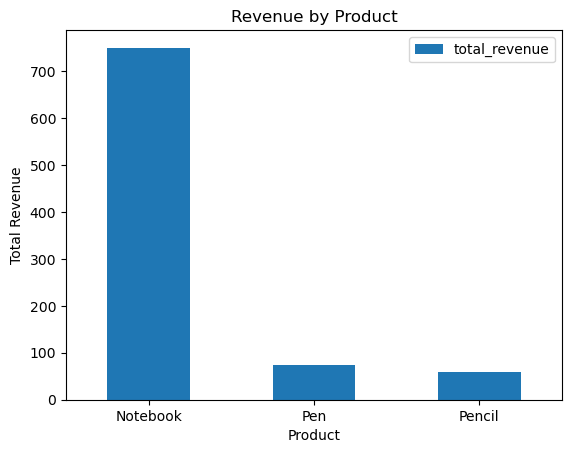

In [31]:
#Plot Bar Chart (Revenue by Product)
df.plot(kind='bar', x='product', y='total_revenue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

In [33]:
#Save Chart
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [35]:
#Close Connection
conn.close()